In [10]:
import SimpleITK as sitk
import numpy as np
from PIL import Image
import os

# Configuration
internal = False

# Set base paths
if internal:
    mhd_base_path = r'C:\Senior_Design\Dataset\mhd'
    tiff_base_path = r'C:\Senior_Design\Dataset\tiff'
else:
    mhd_base_path = r'C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Dataset\mhd'
    tiff_base_path = r'C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Dataset\tiff'

# Specify subfolder paths
folders = {
    "1_Microsphere": "1_Microsphere",
    "2_Tablet": "2_Tablet",
    "3_SprayDriedDispersion": "3_SprayDriedDispersion",
}

In [11]:
# Process each folder
for folder_name, folder_key in folders.items():
    mhd_path = os.path.join(mhd_base_path, folder_key)
    tiff_path = os.path.join(tiff_base_path, folder_key)
    
    # Process "Grayscale" and "Segmented" subfolders
    for subfolder in ["Grayscale", "Segmented"]:
        subfolder_mhd_path = os.path.join(mhd_path, subfolder)
        subfolder_tiff_path = os.path.join(tiff_path, subfolder)
        
        # Ensure TIFF output directory exists
        os.makedirs(subfolder_tiff_path, exist_ok=True)
        
        # Get list of all .mhd files in the subfolder
        for file_name in os.listdir(subfolder_mhd_path):
            if file_name.endswith('.mhd'):
                print(f"Found .mhd file: {file_name} in {subfolder}")
                mhd_file = os.path.join(subfolder_mhd_path, file_name)
                
                try:
                    # Load and convert the .mhd file
                    image = sitk.ReadImage(mhd_file)
                    print(f"Loaded image: {mhd_file}, size: {image.GetSize()}")
                    image_array = sitk.GetArrayFromImage(image)  # Convert to numpy array
                    print(f"Image array shape: {image_array.shape}")
                    print(f"Min: {np.min(image_array)}, Max: {np.max(image_array)}")
                    
                    # Normalize for segmented images (Microsphere: [0:2], Tablet: [0:4], Spray Dried Dispersion: [0:4])
                    if subfolder == "Segmented":
                        if np.max(image_array) > 0:  # Avoid division by zero
                            image_array = (image_array \ np.max(image_array) * 255).astype(np.uint8) # Converts the segmentation labels into visualizable grayscale colors
                        else:
                            print(f"Warning: {mhd_file} is completely black.")
                    
                    # Save each slice as a TIFF file
                    base_name = os.path.splitext(file_name)[0]
                    for i, slice_array in enumerate(image_array):
                        slice_image = Image.fromarray(slice_array)
                        tiff_file = os.path.join(subfolder_tiff_path, f"{base_name}_slice_{i:04d}.tiff")
                        slice_image.save(tiff_file)
                        print(f"Saved TIFF: {tiff_file}")
                except Exception as e:
                    print(f"Error processing {mhd_file}: {e}")

print("All conversions complete!")

Found .mhd file: D1370-D3386_1272_4K_Rec_05192022_cropped.mhd in Grayscale
Loaded image: C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Dataset\mhd\1_Microsphere\Grayscale\D1370-D3386_1272_4K_Rec_05192022_cropped.mhd, size: (1373, 1041, 1585)
Image array shape: (1585, 1041, 1373)
Min: 830, Max: 65535
Saved TIFF: C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Dataset\tiff\1_Microsphere\Grayscale\D1370-D3386_1272_4K_Rec_05192022_cropped_slice_0000.tiff
Saved TIFF: C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Dataset\tiff\1_Microsphere\Grayscale\D1370-D3386_1272_4K_Rec_05192022_cropped_slice_0001.tiff
Saved TIFF: C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Dataset\tiff\1_Microsphere\Grayscale\D1370-D3386_1272_4K_Rec_05192022_cropped_slice_0002.tiff
Sav

Visualizing 1 images from 1_Microsphere - Segmented


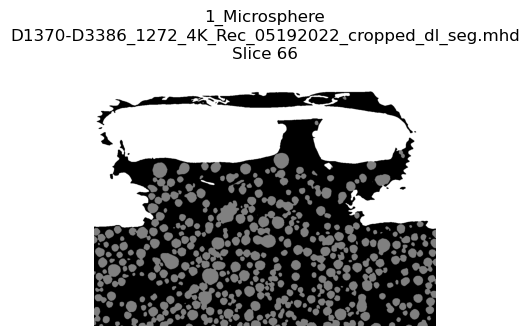

Visualizing 1 images from 2_Tablet - Segmented


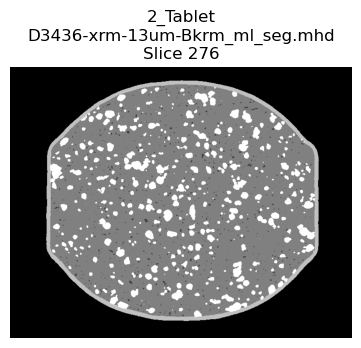

Visualizing 1 images from 3_SprayDriedDispersion - Segmented


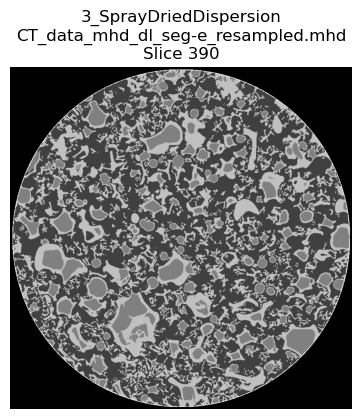

In [8]:
import os
import random
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Set paths for MHD directories
mhd_base_path = r'C:\Senior_Design\Dataset\mhd'

folders = {
    "1_Microsphere": "1_Microsphere",
    "2_Tablet": "2_Tablet",
    "3_SprayDriedDispersion": "3_SprayDriedDispersion",
}

# Function to load and visualize random slices from MHD files
def visualize_mhd_images(base_path, folders, subfolder="Segmented", num_images=3):
    for folder_name, folder_key in folders.items():
        subfolder_path = os.path.join(base_path, folder_key, subfolder)
        if not os.path.exists(subfolder_path):
            print(f"No MHD files found in {subfolder_path}")
            continue
        
        # Collect all MHD files in the folder
        mhd_files = [f for f in os.listdir(subfolder_path) if f.endswith('.mhd')]
        if not mhd_files:
            print(f"No MHD files found in {subfolder_path}")
            continue
        
        # Select random MHD files to visualize
        selected_files = random.sample(mhd_files, min(num_images, len(mhd_files)))
        print(f"Visualizing {len(selected_files)} images from {folder_name} - {subfolder}")
        
        # Plot slices from the selected MHD files
        plt.figure(figsize=(15, 5))
        for i, mhd_file in enumerate(selected_files):
            mhd_path = os.path.join(subfolder_path, mhd_file)
            
            # Load the MHD file
            try:
                image = sitk.ReadImage(mhd_path)
                image_array = sitk.GetArrayFromImage(image)  # Convert to numpy array
                
                # Select a random slice
                random_slice = random.randint(0, image_array.shape[0] - 1)
                slice_array = image_array[random_slice]
                
                # Plot the slice
                plt.subplot(1, num_images, i + 1)
                plt.imshow(slice_array, cmap='gray')
                plt.title(f"{folder_name}\n{mhd_file}\nSlice {random_slice}")
                plt.axis('off')
            except Exception as e:
                print(f"Error loading {mhd_path}: {e}")
        plt.show()

# Visualize MHD images
visualize_mhd_images(mhd_base_path, folders, subfolder="Segmented", num_images=3)
